<a href="https://colab.research.google.com/github/glnrzr/TezCalismasi/blob/master/CatandDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

cats_and_dogs_filtered
|__ train
    |______ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validation
    |______ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [9]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

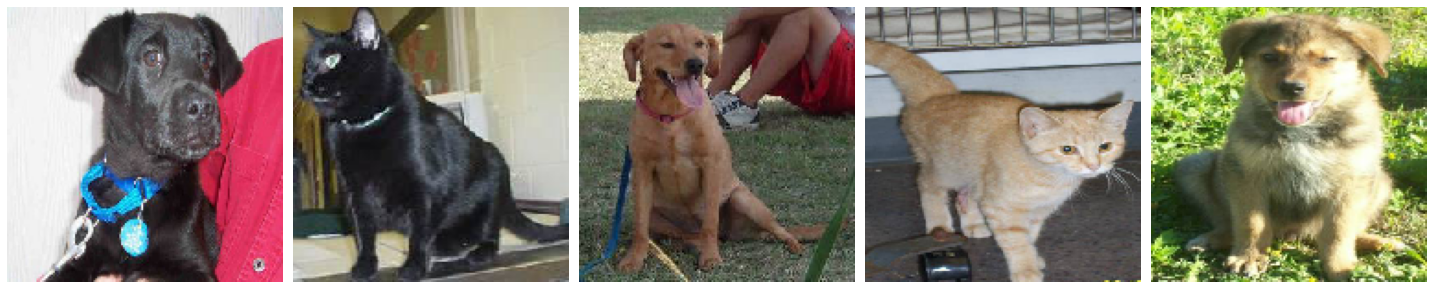

In [16]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [20]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 50s 3s/step - loss: 0.8803 - accuracy: 0.5085 - val_loss: 0.6890 - val_accuracy: 0.4989
Epoch 2/15
15/15 [==============================] - 51s 3s/step - loss: 0.6844 - accuracy: 0.5188 - val_loss: 0.6955 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 50s 3s/step - loss: 0.6693 - accuracy: 0.5561 - val_loss: 0.6500 - val_accuracy: 0.5324
Epoch 4/15
15/15 [==============================] - 49s 3s/step - loss: 0.6160 - accuracy: 0.6293 - val_loss: 0.5942 - val_accuracy: 0.6518
Epoch 5/15
15/15 [==============================] - 49s 3s/step - loss: 0.5756 - accuracy: 0.6800 - val_loss: 0.6141 - val_accuracy: 0.6116
Epoch 6/15
15/15 [==============================] - 49s 3s/step - loss: 0.5528 - accuracy: 0.6982 - val_loss: 0.5720 - val_accuracy: 0.6853
Epoch 7/15
15/15 [==============================] - 49s 3s/step - loss: 0.4853 - acc

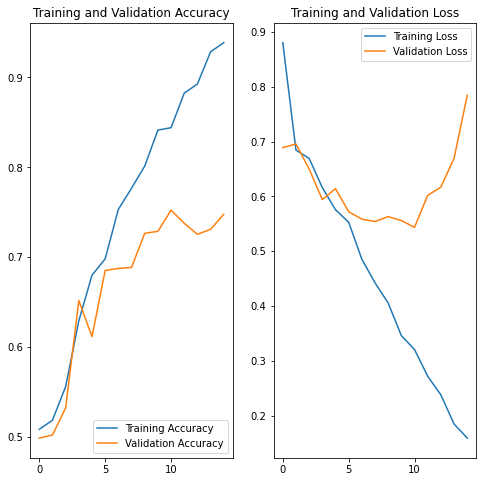

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
import pandas as pd
import spacy

In [0]:
import os

#Text dosyaları data isimli klasör içerisinde olsun
BASE_DIR  = os.getcwd()
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'drive/My Drive/Colab Notebooks/Advances in Fuzzy Systems')


egitim_X = []
#data klasöründeki tüm dosyaları teker teker oku
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    fname = os.path.join(TEXT_DATA_DIR, name)
    #dosya uzantısı .txt ise 
    if fname.endswith(".txt"):
        with open(fname) as infile:
            for line in infile:
                #satır başı ve sonu dışındaki olası boşlukları temizle
                line = line.strip()
                try:
                  egitim_X.append(line)
                except Exception as e:
                  print(e)
                  


In [45]:
import sys
!{sys.executable} -m spacy download en

nlp = spacy.load("en")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [0]:
from keras.preprocessing.text import Tokenizer

# tokinizer nesnesini oluştur

# parametres opsiyonları ve default değerleri
# num_words=None, lower=True, split=' ', char_level=False, oov_token=None
# filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ '

# metinlerde en çok geçen 10 kelimenin işleme alınmasını sağlayalım
MAX_NUM_WORDS = 10
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)


In [0]:
doc = nlp(TEXT_DATA_DIR)

In [48]:
for token in doc:
    print(token)
token.is_space

/content
/
drive
/
My
Drive
/
Colab
Notebooks
/
Advances
in
Fuzzy
Systems


False

In [49]:
# giriş verisine göre tokinizer sınıfının ayarlanması
tokenizer.fit_on_texts(egitim_X)

#tüm texlerde hangi kelimelerin geçtiği
for kelime in tokenizer.word_index:
    print (kelime)

the
of
and
to
in
fuzzy
a
is
for
this
are
we
with
on
by
proposed
an
that
method
based
paper
system
as
using
results
model
data
which
be
from
algorithm
used
soft
new
it
control
has
some
can
been
approach
two
have
also
decision
time
study
set
sets
problem
controller
performance
type
these
order
analysis
each
or
systems
real
different
between
its
such
membership
function
information
process
one
show
number
logic
functions
obtained
2
their
intuitionistic
algorithms
use
developed
methods
properties
parameters
was
numbers
quality
accuracy
our
classification
presented
models
concept
present
network
clustering
making
applied
other
wind
many
compared
given
then
work
introduced
theory
several
space
rules
numerical
matrix
into
first
1
values
introduce
finally
more
optimal
value
technique
crisp
interval
both
neural
solution
problems
not
through
provide
linear
case
all
α
means
considered
applications
under
studied
hybrid
conditions
optimization
application
inference
simulation
various
three
were
sta

# New Section

In [50]:
print(egitim_X)

['The concepts of stratified order-preserving', 'operators and stratified continuity are introduced in L-fuzzy topological spaces. Their basic properties are discussed, and their characteristic', 'properties are observed. The relationship between induced stratified', 'order-preserving topological spaces and general order-preserving operator topological spaces is studied. Finally, stratified connectedness is', 'introduced, and its properties are studied systematically.', 'In this paper, the notions of L-fuzzy prime ideals and maximal L-fuzzy ideals of universal algebras are introduced by applying the general theory of algebraic fuzzy systems.', 'A novel hybrid clustering method, named KC-Means clustering, is proposed for improving upon the clustering time of the Fuzzy C-Means algorithm. The proposed method combines K-Means and Fuzzy C-Means algorithms into two stages. In the first stage, the K-Means algorithm is applied to the dataset to find the centers of a fixed number of groups. In 